In [ ]:
pip install whisper-openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.8 MB/s eta 0:00:00


In [ ]:
import whisper

In [ ]:
pip install librosa

In [3]:
import torch
import whisper
import pytube
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [4]:
import whisper
model_m = whisper.load_model('medium')

100%|█████████████████████████████████████| 1.42G/1.42G [02:09<00:00, 11.8MiB/s]
c:\Users\mfaiz\AppData\Local\Programs\Python\Python312\Lib\site-packages\whisper\__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for

## Add the file path here

1. In mp3 format




In [5]:
file_path = '/content/Ask Dumb Questions Embrace Mistakes and Other Lessons on Innovation Dave Raggio TED [TubeRipper.com].mp3'

In [6]:
#Loading
audio_13 = whisper.load_audio(file_path)
audio_13

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
T = 13

In [ ]:
#Checking the number of samples in our audio file
n_samples =  audio_13.shape[0]
n_samples

6124416

In [ ]:
#Time between samples
delta = T/n_samples
delta

2.1226513679018537e-06

In [ ]:
#Sampling frequency
Fs = 1/delta
Fs

471108.9230769231

In [ ]:
#Time of each sample
time = np.linspace(0,(n_samples-1) * delta,n_samples)
time

array([0.00000000e+00, 2.12265137e-06, 4.24530274e-06, ...,
       1.29999936e+01, 1.29999958e+01, 1.29999979e+01])

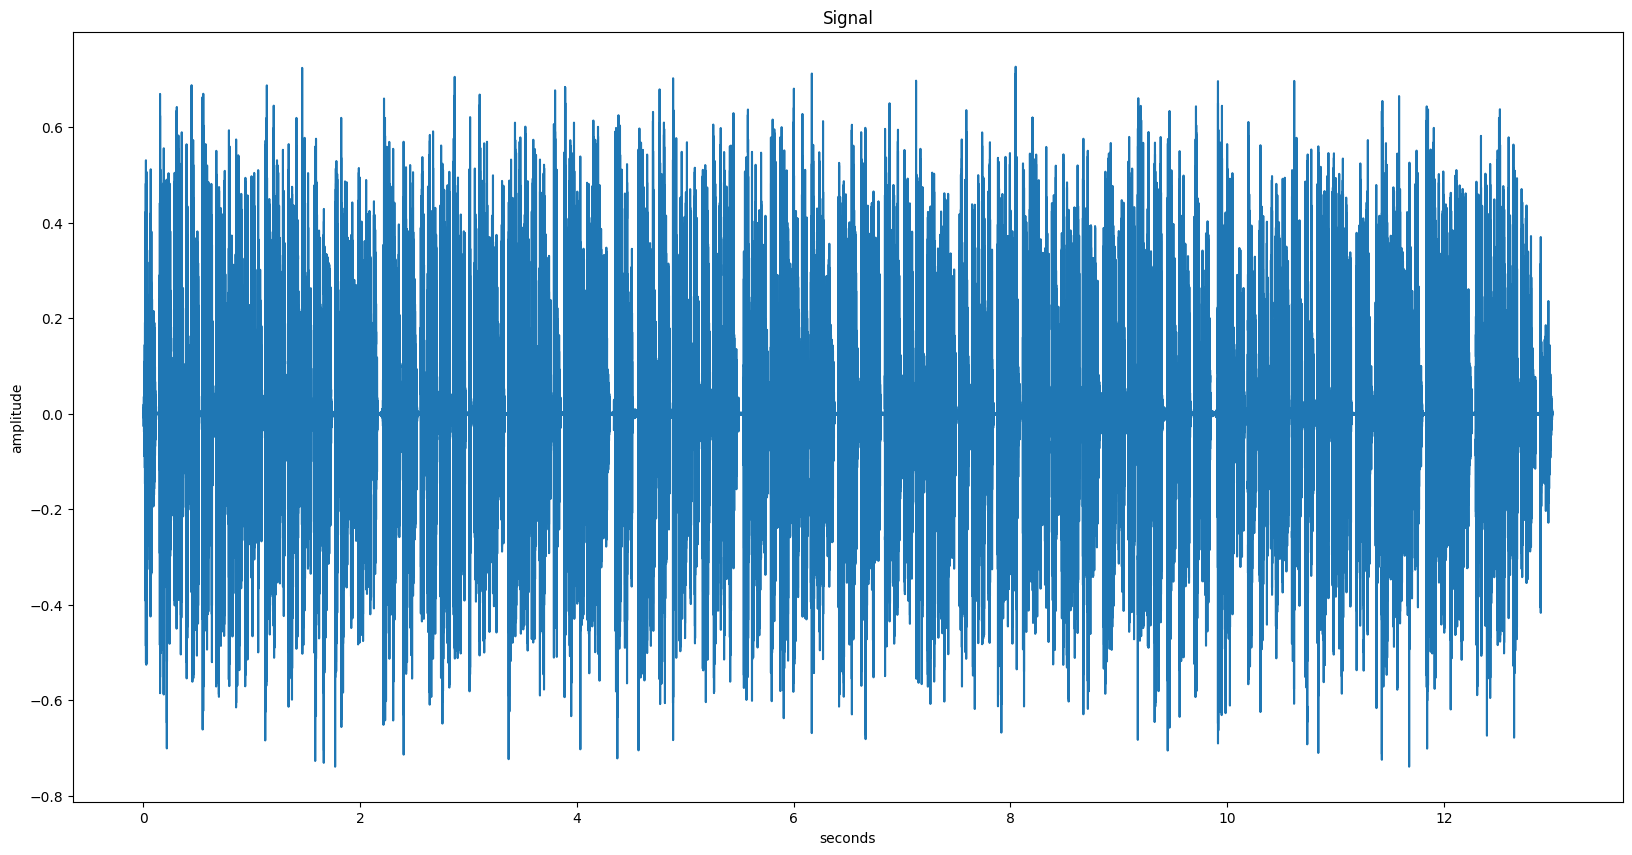

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Signal')
plt.plot(time,audio_13)
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.show()

In [ ]:
audio = whisper.pad_or_trim(audio_13)

In [ ]:
#Number of samples in our trimmed/padded audio
n_samples =  audio.shape[-1]
#Time of each sample
time = np.linspace(0,(n_samples-1)*delta,n_samples)

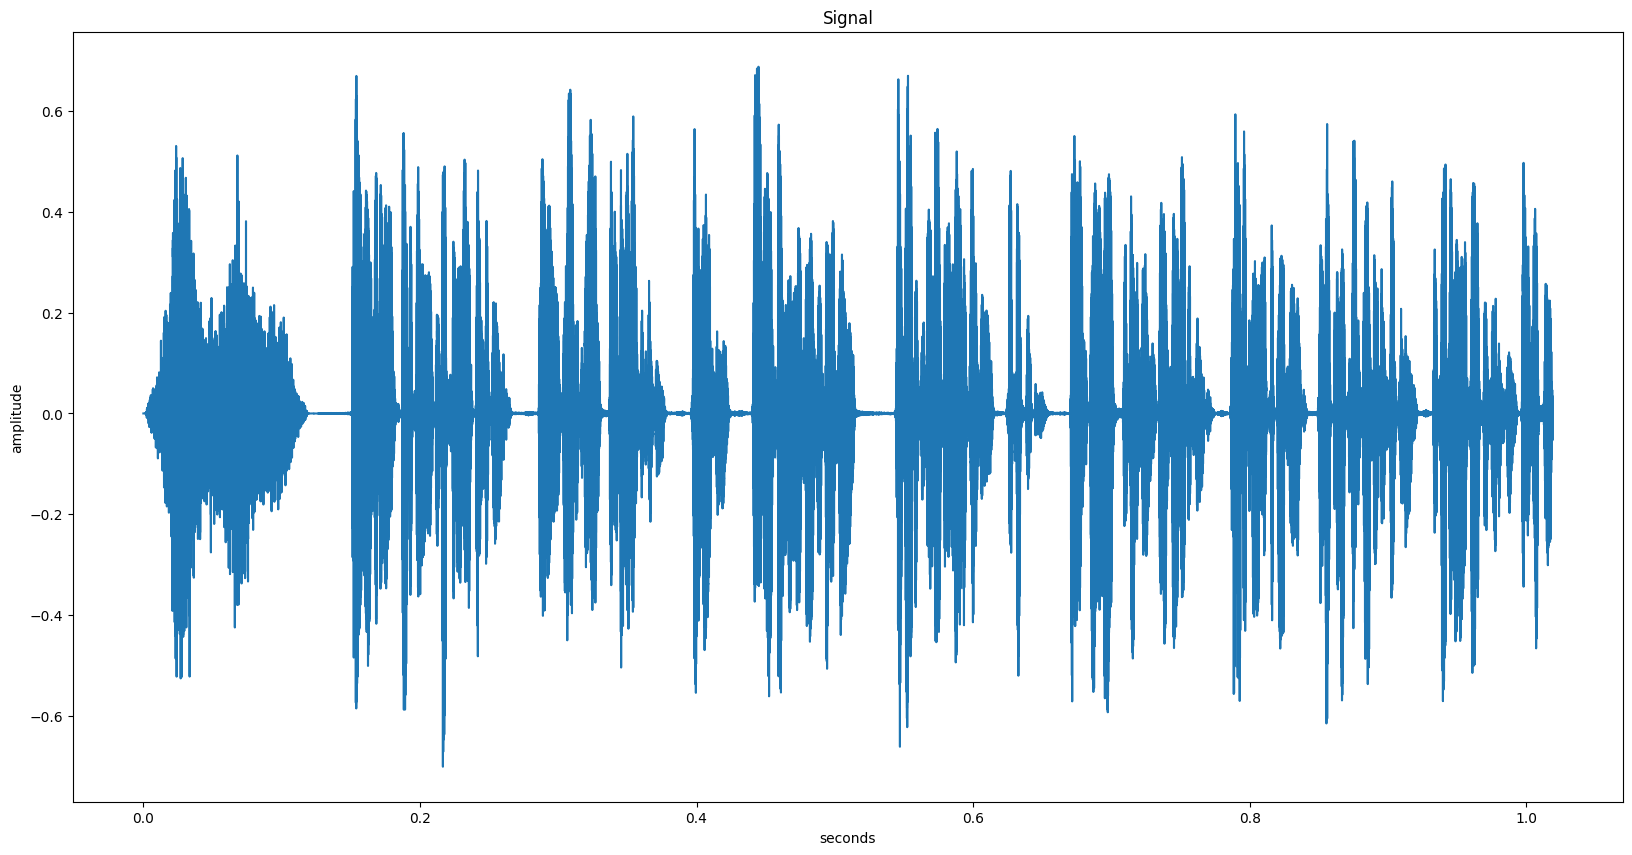

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Signal')
plt.plot(time,audio)
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.show()

In [ ]:
mel = whisper.log_mel_spectrogram(audio).to(model_m.device)

Text(42.722222222222214, 0.5, 'Mel Scale')

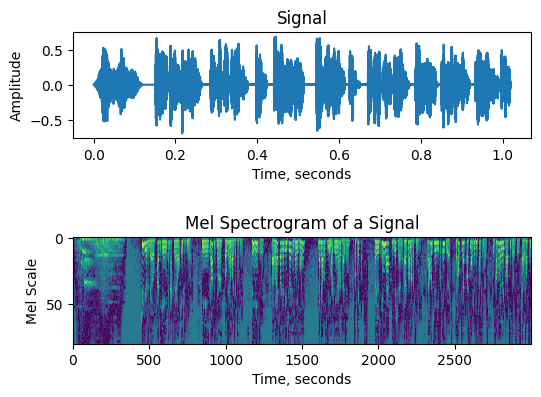

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=5.0)
ax1.plot(time,audio)
ax1.set_title('Signal')
ax1.set_xlabel('Time, seconds')
ax1.set_ylabel('Amplitude')
ax2.imshow((mel.numpy()*mel.numpy())**(1/2),interpolation='nearest', aspect='auto')
ax2.set_title('Mel Spectrogram of a Signal')
ax2.set_xlabel('Time, seconds')
ax2.set_ylabel('Mel Scale')

In [ ]:
sr=22050
ipd.Audio(audio, rate=sr)


In [ ]:
probs = model_m.detect_language(mel)

In [ ]:
probs

(tensor(50259),
 {'en': 0.9987471103668213,
  'zh': 0.00015530564996879548,
  'de': 8.473895286442712e-05,
  'es': 9.166748350253329e-05,
  'ru': 2.989587483170908e-05,
  'ko': 0.00011376108886906877,
  'fr': 0.00016598393267486244,
  'ja': 0.00018178901518695056,
  'pt': 5.128924749442376e-05,
  'tr': 5.034912646806333e-06,
  'pl': 3.8269878132268786e-05,
  'ca': 3.4350497912782885e-07,
  'nl': 4.392762639326975e-05,
  'ar': 2.068024332402274e-05,
  'sv': 5.178938408789691e-06,
  'it': 2.2586356863030232e-05,
  'id': 1.44219993671868e-05,
  'hi': 3.355275475769304e-05,
  'fi': 2.9107231966918334e-06,
  'vi': 4.134179107495584e-06,
  'he': 1.3098455156068667e-06,
  'uk': 1.2083858109690482e-06,
  'el': 1.648045667934639e-06,
  'ms': 2.6568752218736336e-05,
  'cs': 1.99987152882386e-06,
  'ro': 1.046064085130638e-06,
  'da': 2.208223435218315e-07,
  'hu': 3.3344945222779643e-06,
  'ta': 9.97755819298618e-07,
  'no': 4.925570920022437e-07,
  'th': 6.045030204404611e-06,
  'ur': 2.3327415

In [ ]:
transcription = model_m.transcribe(file_path, fp16 = False)['text']

In [ ]:
transcription


" INTUIT Two years ago, I became an accidental intrapreneur, meaning an entrepreneur but within a larger company. Didn't mean to. When I started at Intuit in 2020, my job was to do marketing and advertising for QuickBooks. But it was in that position that I saw an opportunity, an opportunity for Intuit to help connect our small business customers with complimentary products and services that would help them grow and thrive while also being good for our business. Now, I sat on the idea for a while, really wanting to focus on the work that was right in front of me, but I couldn't shake it. So I eventually pulled together a proposal, brought it to our leadership team, and much to my surprise, they said, go pursue it. And it was at that moment I started making every mistake possible and trying to bring it to life. But through those mistakes, I've learned what it means to be a successful intrapreneur, and I'm going to share those mistakes today in the hopes that if there's anyone that has a